<a href="https://colab.research.google.com/github/jalyngearries/GRCATimeSeries/blob/main/Polygon_Pixel_Based_Time_Series_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

## Mount Google Drive to Colab environment (where my AOIs are stored)
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## importing time series data - BASALT

Basalt_BNDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_BNDVI_TimeSeries.csv")
Basalt_DVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_DVI_TimeSeries.csv")
Basalt_GLI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_GLI_TimeSeries.csv")
Basalt_GOSAVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_GOSAVI_TimeSeries.csv")
Basalt_NDREI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_NDREI_TimeSeries.csv")
Basalt_NDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_NDVI_TimeSeries.csv")
Basalt_OSAVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_OSAVI_TimeSeries.csv")
Basalt_RDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/Basalt/Basalt_RDVI_TimeSeries.csv")

In [ ]:
## importing time series data - TRUCK SEAT

TruckSeat_BNDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_BNDVI_TimeSeries.csv")
TruckSeat_DVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_DVI_TimeSeries.csv")
TruckSeat_GLI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_GLI_TimeSeries.csv")
TruckSeat_GOSAVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_GOSAVI_TimeSeries.csv")
TruckSeat_NDREI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_NDREI_TimeSeries.csv")
TruckSeat_NDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_NDVI_TimeSeries.csv")
TruckSeat_OSAVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_OSAVI_TimeSeries.csv")
TruckSeat_RDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/TruckSeat/TruckSeat_RDVI_TimeSeries.csv")

In [ ]:
## importing time series data - 122 MILE CANYON

C122_BNDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_BNDVI_TimeSeries.csv")
C122_DVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_DVI_TimeSeries.csv")
C122_GLI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_GLI_TimeSeries.csv")
C122_GOSAVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_GOSAVI_TimeSeries.csv")
C122_NDREI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_NDREI_TimeSeries.csv")
C122_NDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_NDVI_TimeSeries.csv")
C122_OSAVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_OSAVI_TimeSeries.csv")
C122_RDVI = pd.read_csv("/content/gdrive/MyDrive/GEE Exports/Site Veg Index Outputs/C122/C122_RDVI_TimeSeries.csv")

In [ ]:
# function to convert column names (strings) to datetime
def convert_to_datetime(column_name):
  try:
    return pd.to_datetime(column_name, format='%Y%m%d').strftime('%Y-%m-%d')
  except ValueError:
    return column_name

In [ ]:
    # reshaping dataframe for time series analysis - BASALT

# formatting column names for reformatting
non_date_columns = ['system:index', '.geo']
Basalt_dates = {col: convert_to_datetime(col) for col in Basalt_BNDVI.columns}

# Reshape the DataFrame
Basalt_BNDVI_melted = Basalt_BNDVI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')
Basalt_DVI_melted = Basalt_DVI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')
Basalt_GLI_melted = Basalt_GLI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')
Basalt_GOSAVI_melted = Basalt_GOSAVI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')
Basalt_NDREI_melted = Basalt_NDREI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')
Basalt_NDVI_melted = Basalt_NDVI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')
Basalt_OSAVI_melted = Basalt_OSAVI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')
Basalt_RDVI_melted = Basalt_RDVI.melt(id_vars=non_date_columns, value_vars=Basalt_dates, var_name='Date', value_name='Value')

# format date
Basalt_BNDVI_melted['Date'] = pd.to_datetime(Basalt_BNDVI_melted['Date'])
Basalt_DVI_melted['Date'] = pd.to_datetime(Basalt_DVI_melted['Date'])
Basalt_GLI_melted['Date'] = pd.to_datetime(Basalt_GLI_melted['Date'])
Basalt_GOSAVI_melted['Date'] = pd.to_datetime(Basalt_GOSAVI_melted['Date'])
Basalt_NDREI_melted['Date'] = pd.to_datetime(Basalt_NDREI_melted['Date'])
Basalt_NDVI_melted['Date'] = pd.to_datetime(Basalt_NDVI_melted['Date'])
Basalt_OSAVI_melted['Date'] = pd.to_datetime(Basalt_OSAVI_melted['Date'])
Basalt_RDVI_melted['Date'] = pd.to_datetime(Basalt_RDVI_melted['Date'])

# formatting the date as the index
cols_to_remove = ['system:index', '.geo']

Basalt_BNDVI_date_index = Basalt_BNDVI_melted.set_index('Date').drop(columns=cols_to_remove)
Basalt_DVI_date_index = Basalt_DVI_melted.set_index('Date').drop(columns=cols_to_remove)
Basalt_GLI_date_index = Basalt_GLI_melted.set_index('Date').drop(columns=cols_to_remove)
Basalt_GOSAVI_date_index = Basalt_GOSAVI_melted.set_index('Date').drop(columns=cols_to_remove)
Basalt_NDREI_date_index = Basalt_NDREI_melted.set_index('Date').drop(columns=cols_to_remove)
Basalt_NDVI_date_index = Basalt_NDVI_melted.set_index('Date').drop(columns=cols_to_remove)
Basalt_OSAVI_date_index = Basalt_OSAVI_melted.set_index('Date').drop(columns=cols_to_remove)
Basalt_RDVI_date_index = Basalt_RDVI_melted.set_index('Date').drop(columns=cols_to_remove)

In [ ]:
    # reshaping dataframe for time series analysis - TRUCK SEAT

# formatting column names for reformatting
non_date_columns = ['system:index', '.geo']
TruckSeat_dates = {col: convert_to_datetime(col) for col in TruckSeat_BNDVI.columns}

# Reshape the DataFrame
TruckSeat_BNDVI_melted = TruckSeat_BNDVI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')
TruckSeat_DVI_melted = TruckSeat_DVI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')
TruckSeat_GLI_melted = TruckSeat_GLI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')
TruckSeat_GOSAVI_melted = TruckSeat_GOSAVI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')
TruckSeat_NDREI_melted = TruckSeat_NDREI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')
TruckSeat_NDVI_melted = TruckSeat_NDVI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')
TruckSeat_OSAVI_melted = TruckSeat_OSAVI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')
TruckSeat_RDVI_melted = TruckSeat_RDVI.melt(id_vars=non_date_columns, value_vars=TruckSeat_dates, var_name='Date', value_name='Value')

# format date
TruckSeat_BNDVI_melted['Date'] = pd.to_datetime(TruckSeat_BNDVI_melted['Date'])
TruckSeat_DVI_melted['Date'] = pd.to_datetime(TruckSeat_DVI_melted['Date'])
TruckSeat_GLI_melted['Date'] = pd.to_datetime(TruckSeat_GLI_melted['Date'])
TruckSeat_GOSAVI_melted['Date'] = pd.to_datetime(TruckSeat_GOSAVI_melted['Date'])
TruckSeat_NDREI_melted['Date'] = pd.to_datetime(TruckSeat_NDREI_melted['Date'])
TruckSeat_NDVI_melted['Date'] = pd.to_datetime(TruckSeat_NDVI_melted['Date'])
TruckSeat_OSAVI_melted['Date'] = pd.to_datetime(TruckSeat_OSAVI_melted['Date'])
TruckSeat_RDVI_melted['Date'] = pd.to_datetime(TruckSeat_RDVI_melted['Date'])

# formatting the date as the index
cols_to_remove = ['system:index', '.geo']

TruckSeat_BNDVI_date_index = TruckSeat_BNDVI_melted.set_index('Date').drop(columns=cols_to_remove)
TruckSeat_DVI_date_index = TruckSeat_DVI_melted.set_index('Date').drop(columns=cols_to_remove)
TruckSeat_GLI_date_index = TruckSeat_GLI_melted.set_index('Date').drop(columns=cols_to_remove)
TruckSeat_GOSAVI_date_index = TruckSeat_GOSAVI_melted.set_index('Date').drop(columns=cols_to_remove)
TruckSeat_NDREI_date_index = TruckSeat_NDREI_melted.set_index('Date').drop(columns=cols_to_remove)
TruckSeat_NDVI_date_index = TruckSeat_NDVI_melted.set_index('Date').drop(columns=cols_to_remove)
TruckSeat_OSAVI_date_index = TruckSeat_OSAVI_melted.set_index('Date').drop(columns=cols_to_remove)
TruckSeat_RDVI_date_index = TruckSeat_RDVI_melted.set_index('Date').drop(columns=cols_to_remove)

In [ ]:
    # reshaping dataframe for time series analysis - 122 MILE CANYON

# formatting column names for reformatting
non_date_columns = ['system:index', '.geo']
C122_dates = {col: convert_to_datetime(col) for col in C122_BNDVI.columns}

# Reshape the DataFrame
C122_BNDVI_melted = C122_BNDVI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')
C122_DVI_melted = C122_DVI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')
C122_GLI_melted = C122_GLI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')
C122_GOSAVI_melted = C122_GOSAVI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')
C122_NDREI_melted = C122_NDREI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')
C122_NDVI_melted = C122_NDVI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')
C122_OSAVI_melted = C122_OSAVI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')
C122_RDVI_melted = C122_RDVI.melt(id_vars=non_date_columns, value_vars=C122_dates, var_name='Date', value_name='Value')

# format date
C122_BNDVI_melted['Date'] = pd.to_datetime(C122_BNDVI_melted['Date'])
C122_DVI_melted['Date'] = pd.to_datetime(C122_DVI_melted['Date'])
C122_GLI_melted['Date'] = pd.to_datetime(C122_GLI_melted['Date'])
C122_GOSAVI_melted['Date'] = pd.to_datetime(C122_GOSAVI_melted['Date'])
C122_NDREI_melted['Date'] = pd.to_datetime(C122_NDREI_melted['Date'])
C122_NDVI_melted['Date'] = pd.to_datetime(C122_NDVI_melted['Date'])
C122_OSAVI_melted['Date'] = pd.to_datetime(C122_OSAVI_melted['Date'])
C122_RDVI_melted['Date'] = pd.to_datetime(C122_RDVI_melted['Date'])

# formatting the date as the index
cols_to_remove = ['system:index', '.geo']

C122_BNDVI_date_index = C122_BNDVI_melted.set_index('Date').drop(columns=cols_to_remove)
C122_DVI_date_index = C122_DVI_melted.set_index('Date').drop(columns=cols_to_remove)
C122_GLI_date_index = C122_GLI_melted.set_index('Date').drop(columns=cols_to_remove)
C122_GOSAVI_date_index = C122_GOSAVI_melted.set_index('Date').drop(columns=cols_to_remove)
C122_NDREI_date_index = C122_NDREI_melted.set_index('Date').drop(columns=cols_to_remove)
C122_NDVI_date_index = C122_NDVI_melted.set_index('Date').drop(columns=cols_to_remove)
C122_OSAVI_date_index = C122_OSAVI_melted.set_index('Date').drop(columns=cols_to_remove)
C122_RDVI_date_index = C122_RDVI_melted.set_index('Date').drop(columns=cols_to_remove)

In [ ]:
    # combining dataframes

    # adding site name to each dataframe

  # bndvi
C122_BNDVI_date_index['Site'] = 'C122'
Basalt_BNDVI_date_index['Site'] = 'Basalt'
TruckSeat_BNDVI_date_index['Site'] = 'TruckSeat'

BNDVI_combined = pd.concat([Basalt_BNDVI_date_index, C122_BNDVI_date_index, TruckSeat_BNDVI_date_index])

  # dvi
C122_DVI_date_index['Site'] = 'C122'
Basalt_DVI_date_index['Site'] = 'Basalt'
Basalt_DVI_date_index['Site'] = 'Basalt'

DVI_combined = pd.concat([Basalt_DVI_date_index, C122_DVI_date_index, TruckSeat_DVI_date_index])

  # gli
C122_GLI_date_index['Site'] = 'C122'
Basalt_GLI_date_index['Site'] = 'Basalt'
TruckSeat_GLI_date_index['Site'] = 'TruckSeat'

GLI_combined = pd.concat([Basalt_GLI_date_index, C122_GLI_date_index, TruckSeat_GLI_date_index])

  # gosavi
C122_GOSAVI_date_index['Site'] = 'C122'
Basalt_GOSAVI_date_index['Site'] = 'Basalt'
TruckSeat_GOSAVI_date_index['Site'] = 'TruckSeat'

GOSAVI_combined = pd.concat([Basalt_GOSAVI_date_index, C122_GOSAVI_date_index, TruckSeat_GOSAVI_date_index])

  # ndrei
C122_NDREI_date_index['Site'] = 'C122'
Basalt_NDREI_date_index['Site'] = 'Basalt'
TruckSeat_NDREI_date_index['Site'] = 'TruckSeat'

NDREI_combined = pd.concat([Basalt_NDREI_date_index, C122_NDREI_date_index, TruckSeat_NDREI_date_index])

  # ndvi
C122_NDVI_date_index['Site'] = 'C122'
Basalt_NDVI_date_index['Site'] = 'Basalt'
TruckSeat_NDVI_date_index['Site'] = 'TruckSeat'

NDVI_combined = pd.concat([Basalt_NDVI_date_index, C122_NDVI_date_index, TruckSeat_NDVI_date_index])

  # osavi
C122_OSAVI_date_index['Site'] = 'C122'
Basalt_OSAVI_date_index['Site'] = 'Basalt'
TruckSeat_OSAVI_date_index['Site'] = 'TruckSeat'

OSAVI_combined = pd.concat([Basalt_OSAVI_date_index, C122_OSAVI_date_index, TruckSeat_OSAVI_date_index])

  # rdvi
C122_RDVI_date_index['Site'] = 'C122'
Basalt_RDVI_date_index['Site'] = 'Basalt'
TruckSeat_RDVI_date_index['Site'] = 'TruckSeat'

RDVI_combined = pd.concat([Basalt_RDVI_date_index, C122_RDVI_date_index, TruckSeat_RDVI_date_index])



In [ ]:
OSAVI_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31846 entries, 2020-07-18 to 2024-04-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   31846 non-null  float64
 1   Site    31846 non-null  object 
dtypes: float64(1), object(1)
memory usage: 746.4+ KB


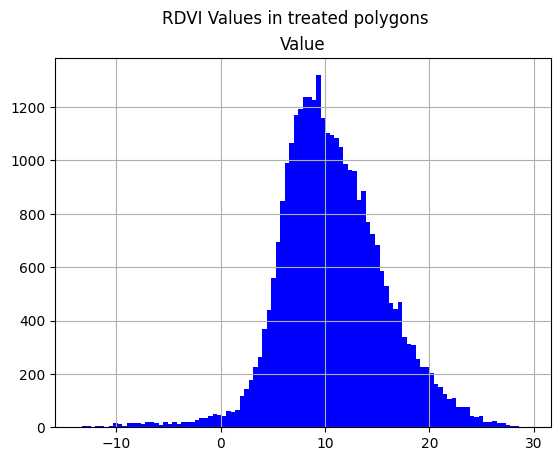

In [ ]:
ax = RDVI_combined.hist(bins=100, color='blue')

plt.suptitle("RDVI Values in treated polygons")
plt.show()

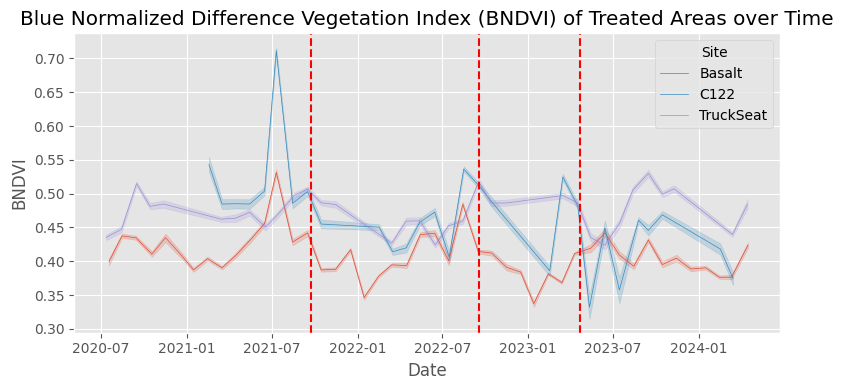

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=BNDVI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Blue Normalized Difference Vegetation Index (BNDVI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('BNDVI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()

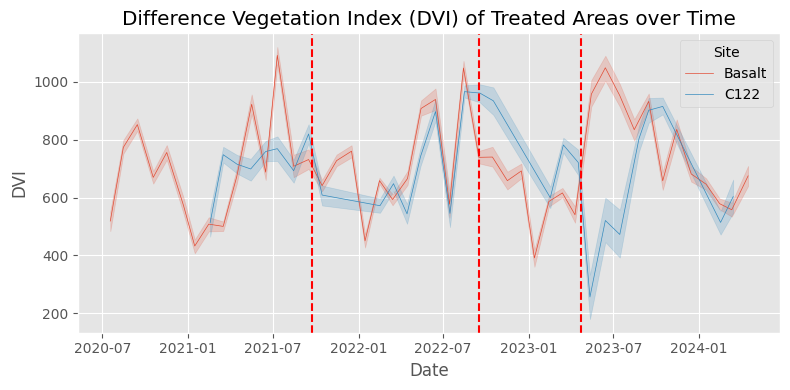

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=DVI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Difference Vegetation Index (DVI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('DVI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()

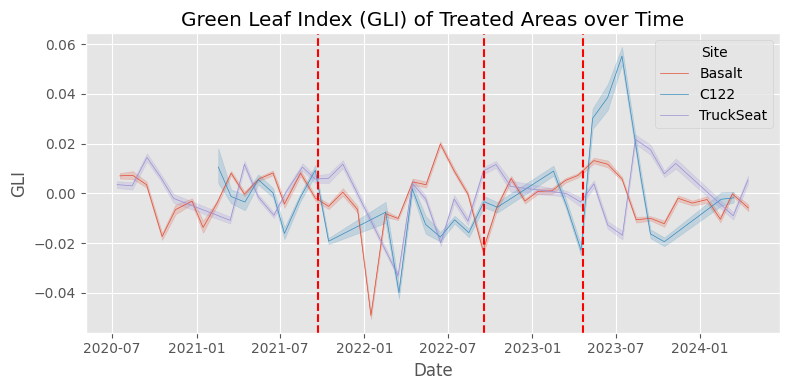

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=GLI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Green Leaf Index (GLI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('GLI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()

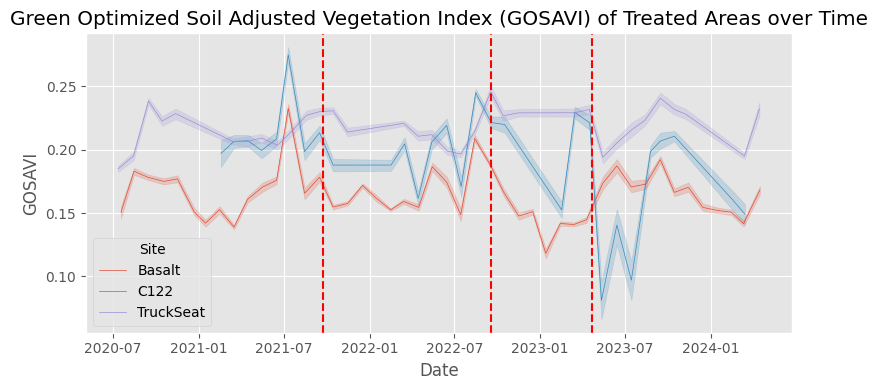

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=GOSAVI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Green Optimized Soil Adjusted Vegetation Index (GOSAVI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('GOSAVI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()

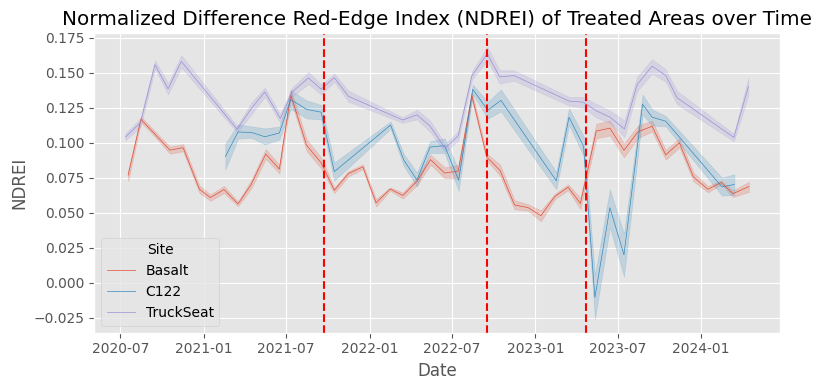

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=NDREI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Normalized Difference Red-Edge Index (NDREI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('NDREI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()

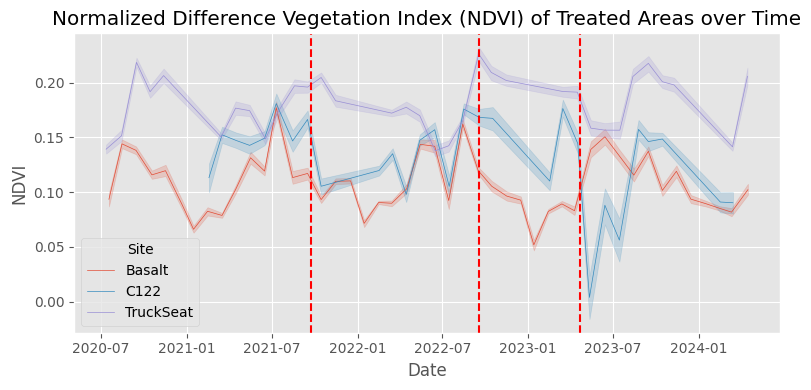

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=NDVI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Normalized Difference Vegetation Index (NDVI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()

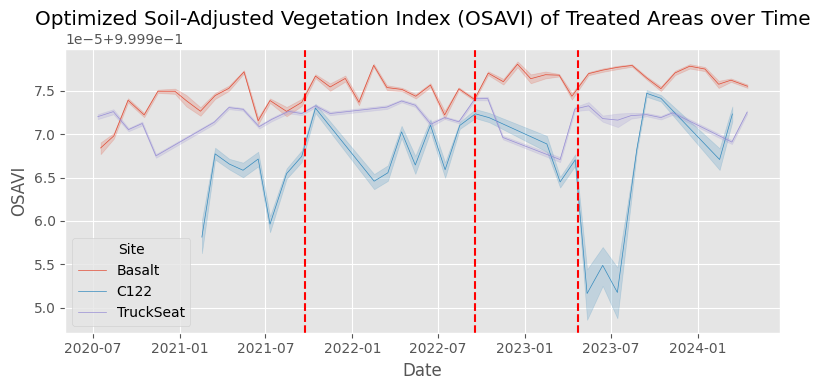

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=OSAVI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Optimized Soil-Adjusted Vegetation Index (OSAVI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('OSAVI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()

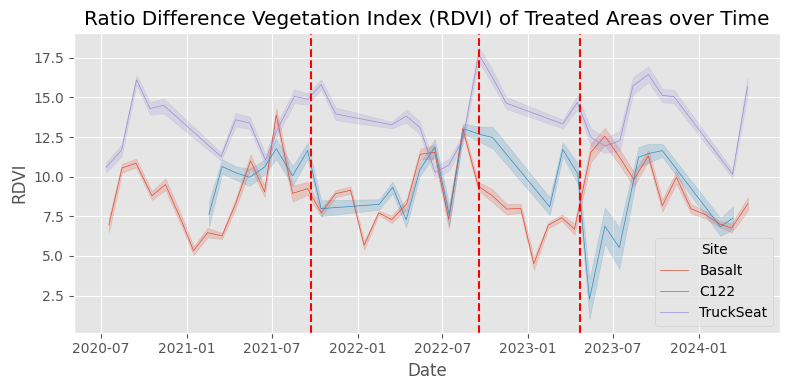

In [ ]:
# visualizing time series

plt.figure(figsize=(8,4))
sns.lineplot(data=RDVI_combined,
             x='Date',
             y='Value',
             hue= 'Site',
             linewidth=0.5)

plt.title("Ratio Difference Vegetation Index (RDVI) of Treated Areas over Time")
plt.xlabel('Date')
plt.ylabel('RDVI')
plt.style.use('ggplot')

plt.axvline(pd.to_datetime('2021-09-23'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2022-09-17'), color='red', linestyle='--')
plt.axvline(pd.to_datetime('2023-04-22'), color='red', linestyle='--')
plt.tight_layout()